Found 7 images.
Image: ../../assets/samples/duckies_simulation/duckie_sim_05.jpg


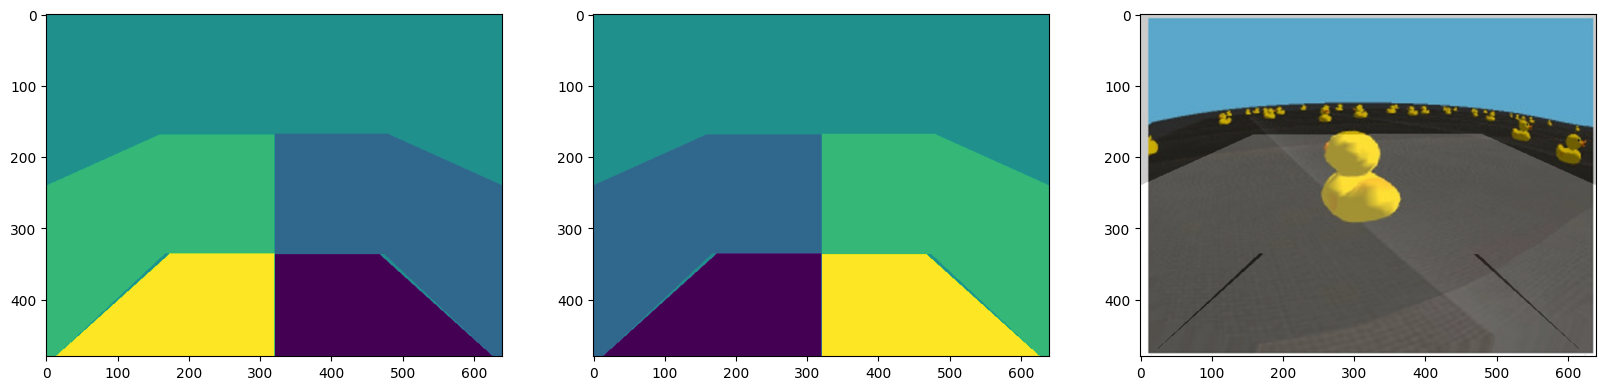

In [25]:
# import pylab as plt
import sys
import matplotlib.pyplot as plt
import numpy as np
import glob
import random
from PIL import Image
np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(threshold=np.inf)
from matplotlib.path import Path

def get_symmetry(P, W):
    Q = []
    for (x,y) in P:
        Q.append((x,W-y))
    return Q

height, width = 480,640
# height, width = 14,20

x, y = np.mgrid[:height, :width]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

# Zone 1: band on left hand side
p1 = [  (1.0*height, 0.*width), 
        (0.5*height, 0.*width), 
        (0.35*height, 0.25*width), 
        (0.35*height, 0.5*width), 
        (0.7*height, 0.5*width), 
        (0.7*height, 0.26*width),
        (1.*height, 0.02*width)] # start bottom-left corner, going CW
mask1 = Path(p1).contains_points(coors) * 1
# Zone2: symmetric to zone1
p2 = get_symmetry(p1, width)
mask2 = Path(p2).contains_points(coors) * -1

# Zone 3: band on left hand side
p3 = [(1.*height, 0.02*width), (1.*height, 0.5*width), (0.7*height, 0.5*width), (0.7*height, 0.27*width)] # going CCW
mask3 = Path(p3).contains_points(coors) * 1
# Zone4: symmetric to zone3
p4 = get_symmetry(p3, width)
mask4 = Path(p4).contains_points(coors) * -1

mask_Left = mask1 + mask2 + mask3 + mask4
mask_Right = - mask1 - mask2 - mask3 - mask4

# Read image
dirname = '../../assets/samples/duckies_simulation'
images = glob.glob(f'{dirname}/*.jpg')
print(f"Found {len(images)} images.")
im = random.choice(images)
print(f"Image: {im}")
I = Image.open(im).convert('RGBA').resize((width,height))

# Create blended mask+image
mymask = mask_Left.astype(int).copy().reshape(height, width)
mymask[mymask != 0] = 1
M = Image.fromarray(np.uint8(mymask*255)).convert('RGBA')
B = Image.blend(I, M, alpha=.2)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,8))
ax1.imshow(mask_Left.reshape(height, width), aspect = 1)
ax2.imshow(mask_Right.reshape(height, width), aspect = 1)
ax3.imshow(B, aspect = 1)
plt.show()


In [11]:
print(mask_Left.shape)
print(mask_Left.reshape(height, width))

(307200,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   